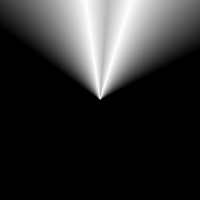

In [43]:
import random
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
 
def brightness(X, P0, v1, v2, width, eps, fade, size):
    
    bright = 0
    
    if np.linalg.norm(X - P0) !=0:
        dist1 = np.dot(v1, X-P0)/ np.linalg.norm(X-P0)
    else:
        dist1 = 0
    
    if np.linalg.norm(X - P0) !=0:
        dist2 = np.dot(v2, X-P0)/ np.linalg.norm(X-P0)
    else:
        dist2 = 0
        
    #if np.dot(X-P0,v1)>0:
        #dist1 = np.linalg.norm(np.cross(v1,X-P0))/ np.linalg.norm(v1)   # distance between X and v1
        #dist1 = dist1 - width*((size/2) - np.dot(v1,X-P0))/ (size/2)    # account for angular fading
    #else:
        #dist1 = np.linalg.norm(X-P0)
        #dist1 = dist1 - width
 
    #if np.dot(X-P0,v2)>0:
        #dist2 = np.linalg.norm(np.cross(v2,X-P0))/ np.linalg.norm(v2)   # distance between X and v2
        #dist2 = dist2 - width*((size/2) - np.dot(v2,X-P0))/ (size/2)    # account for angular fading
    #else:
        #dist2 = np.linalg.norm(X-P0)
        #dist2 = dist2 - width
 
    dist = math.acos(max(dist1,dist2))

    #bright += (fade - dist)/(2*fade)     # account for shift fading
    
    bright = (width+fade-dist)/(fade)
    
    if eps >0:
        bright += np.random.normal(0,eps)
    if bright >= 1:
        bright = 1
    if bright < 0:
        bright = 0
 
    return bright
 
def generate_angle(size = 10, width = 0, epsilon = 0, fade=1):

    # size := size of the image (size by size pixels)
    # width := the width of each line
    # epsilon := the magnitude of noise
    # fade := the fading speed

    n = size
    angle1 = random.random()*2*math.pi
    direction1 = np.array([math.cos(angle1),math.sin(angle1)])
    angle2 = random.random()*2*math.pi
    direction2 = np.array([math.cos(angle2),math.sin(angle2)])
    #centerpoint = np.array([random.random()*n,random.random()*n])  # This line is for random centerpoint 
    centerpoint = np.array([n/2,n/2])                               # This line is for fixed centerpoint
    brightness_matrix = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            X = np.array([x+0.5,y+0.5])
            brightness_matrix[x,y] = int(brightness(X,centerpoint,direction1,direction2,width,epsilon,fade,size)*255)
    return brightness_matrix

def generate_data(N = 1000, size = 10, width = 0, filename = 'data.csv', epsilon = 0, fade=1):
    
    # Generates a csv file with N datapoints in it
    # N := number of datapoints (recommended ~size^3)
    # size := size of the image (size by size pixels)
    # width := the width of each line
    # filename := file name where to put the dataset (csv format)
    # epsilon := the magnitude of noise
    # fade := the size of the fading part
    
    data_set = np.zeros((N, size**2))
    for i in range(N):
        data_set[i] = np.ravel(generate_angle(size=size, width=width, epsilon=epsilon, fade = fade))
    np.savetxt(filename, data_set, fmt = '%i', delimiter = ',')
    return data_set

def distance_graph(N=1000, n=10, w=0, fade = 1):
    
    # Finds the (scaled) distance to the closest datapoint given the amount of points in the dataset.
    
    angle = generate_angle(size = n, width = w) / 255
    dist = n**2
    dist_vector=[]
    for i in range(N):
        angle_new = np.ravel(generate_angle(size = n, width = w, fade = fade) / 255)
        temp_dist = np.linalg.norm(angle-angle_new)
        if temp_dist<dist:
            dist=temp_dist
        dist_vector.append(dist)
    plt.plot(dist_vector)
    plt.show()
    return dist_vector

#distance_graph()

def get_image(brightness_matrix):
    
    # Generates an image of the angle
    
    brightness_matrix = brightness_matrix.astype('uint8')
    im = Image.fromarray(brightness_matrix)
    return im
    

#generate_data(N=1000, size=50, fade=0.8, filename = 'Fixed_center_N=1000_size=50_f=0.8.csv')
get_image(generate_angle(size=200,fade=0.8))
